In [3]:
# Etapa 1: Carregamento dos dados do dataset e Pré processamento

In [4]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA


In [5]:
# header indica que 1º linha inidicará o cabeçalho. decimal indica que os números decimais estão usando vírgula como separador.
# sep indica que o ponto-vírugla é o separador das colunas no arquivo csv.
df = pd.read_csv('brca_mirnaseq.csv', sep=';', header=0, decimal=',')
df.head()

,hsa.let.7a.1,hsa.let.7a.2,hsa.let.7a.3,hsa.let.7b,hsa.let.7c,hsa.let.7d,hsa.let.7e,hsa.let.7f.1,hsa.let.7f.2,hsa.let.7g,...,hsa.mir.941.1,hsa.mir.942,hsa.mir.943,hsa.mir.944,hsa.mir.95,hsa.mir.96,hsa.mir.98,hsa.mir.99a,hsa.mir.99b,class
0,8962.996542,17779.575039,9075.200383,24749.898857,341.298400,406.164781,1470.179650,14.716795,3627.642977,387.417272,...,0.0,5.530515,0.187475,2.062226,4.124452,119.984057,53.992826,130.201449,46548.939810,TP
1,7739.739862,15524.941906,7713.626636,23374.640471,801.487258,513.297924,560.962427,20.922042,6557.093894,350.955461,...,0.0,8.180047,0.000000,0.629234,1.258469,60.249189,86.047798,236.434808,12644.149725,TP
2,8260.612670,16497.981335,8355.342958,10957.355911,635.811272,620.351816,2694.331127,39.799878,11830.760394,600.725980,...,0.0,3.618171,0.000000,0.767491,1.644623,97.252043,117.645369,191.434123,33083.456616,TP
3,9056.241254,18075.168478,9097.666150,26017.522731,2919.348415,334.245155,1322.434475,17.866463,6438.725384,354.957604,...,0.0,3.478426,0.000000,3.478426,1.739213,72.572624,41.583007,1046.690127,24067.232290,TP
4,10897.303665,21822.338727,10963.956320,22204.253575,3313.009950,350.615669,1711.886682,22.541895,8246.117280,333.425447,...,0.0,2.108235,0.000000,1.135203,0.810860,19.947145,34.380445,1081.037952,25715.275426,TP


In [6]:
# Etapa 2: Análise exploratória

In [7]:
# Observa no dataset acima que os dados possuiem uma magnitude muito diverente. Nota-se que há colunas com valores decimais
# muito grandes (acima de 40000) e outras muito pequenos (0.2)

In [8]:
df.shape

(842, 898)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Columns: 898 entries, hsa.let.7a.1 to class
dtypes: float64(897), object(1)
memory usage: 5.8+ MB


TP    755
NT     87
Name: class, dtype: int64

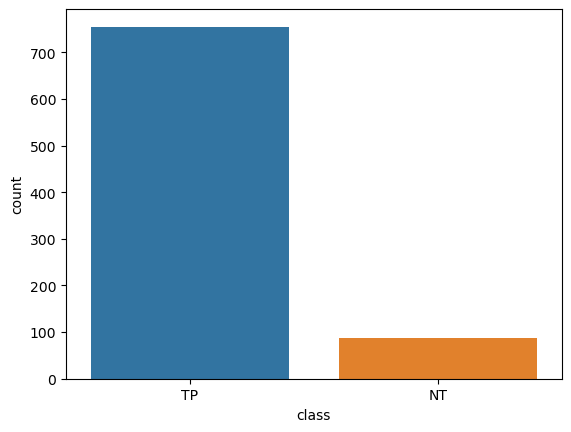

In [10]:
# Verificando balanceamento dos dados da coluna class (tumor ou sem tumor)
ax = sns.countplot(x="class", data=df)
df["class"].value_counts()

In [11]:
# Transforma a contagem de amostras em porcentagem e retorna a proporção dos dados.
df["class"].value_counts(normalize=True)

TP    0.896675
NT    0.103325
Name: class, dtype: float64

In [12]:
df.describe()

,hsa.let.7a.1,hsa.let.7a.2,hsa.let.7a.3,hsa.let.7b,hsa.let.7c,hsa.let.7d,hsa.let.7e,hsa.let.7f.1,hsa.let.7f.2,hsa.let.7g,...,hsa.mir.940,hsa.mir.941.1,hsa.mir.942,hsa.mir.943,hsa.mir.944,hsa.mir.95,hsa.mir.96,hsa.mir.98,hsa.mir.99a,hsa.mir.99b
count,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,...,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000
mean,9218.938921,18432.504585,9289.250466,26606.604836,3152.699471,558.321269,1289.570177,24.359962,8687.461926,610.223836,...,5.902975,0.003737,6.446279,0.061018,2.320737,3.150482,38.307053,63.746405,1034.572148,44369.112203
std,4843.796136,9704.187427,4858.691217,16745.347957,3238.003201,346.883205,763.056055,12.490091,6052.615278,317.854963,...,8.325681,0.049274,9.541682,0.172214,6.527536,4.287594,33.791795,40.145314,1117.491608,32754.290751
min,1294.149164,2599.981125,1319.952907,1817.920354,148.795934,79.783216,161.181457,2.439034,653.474578,88.614573,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.374223,18.400719,3475.079227
25%,5902.143848,11741.467528,5933.706564,14580.357100,1276.700850,330.638301,809.867504,16.441786,4648.822942,410.859815,...,1.378098,0.000000,2.464140,0.000000,0.373238,1.201951,14.906921,39.913493,387.430475,22769.094433
50%,8016.628565,16040.589880,8103.783439,23097.825936,2352.902327,481.342371,1101.403395,21.890340,7019.157941,532.277053,...,3.192098,0.000000,4.127957,0.000000,1.036215,2.235731,29.634884,52.993693,710.026124,35594.670263
75%,11236.887034,22538.594950,11289.595988,34373.185504,3971.192192,681.931022,1619.864372,29.395515,10926.448322,724.277709,...,7.159431,0.000000,7.551755,0.000000,2.345941,4.030888,51.258145,75.993914,1242.434228,53462.034662
max,45101.697434,90233.655610,45095.490102,144706.427973,59677.212349,3370.036117,11617.011618,121.408006,80780.055188,3342.745045,...,91.996543,0.909391,184.185656,1.757516,122.685820,93.402785,259.127121,399.078716,15689.499524,248074.178531


In [13]:
# Nota-se que o modelo está desbalanceado, podendo deixar o modelo tendêncioso, uma vez que quase 90% das amostras 
# são de pacientes com tumor.

In [14]:
# Baseline comparativo (uma solução simples para o problema).
# Será usada a coluna class como variável dependente (y) e as colunas dos microRNAs como variáveis independetes (x).
# Dividindo o dataset em 30% teste e 70% treino. 
# Stratify = garante que os valores para treino e teste sejam iguais.

x = df.drop("class", axis=1)
y = df["class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify=y , random_state=42)

In [15]:
y_train.value_counts(normalize=True)

TP    0.896435
NT    0.103565
Name: class, dtype: float64

In [16]:
y_test.value_counts(normalize=True)

TP    0.897233
NT    0.102767
Name: class, dtype: float64

In [17]:
# Nota-se que ambas partições (treino e teste) apresentam as mesmas proporções.

In [18]:
# Regressão logística é um método estatístico para prever classes binárias.

In [19]:
# Aplicação de Regressão Logística
# cross_val_score irá aplicar uma validação cruzada na regressão logística e o conjunto de treinamento, computando a acurácia.
lrc = LogisticRegression(random_state=42)

cv_list_lr_baseline = cross_val_score(
    lrc,
    x_train,
    y_train,
    cv=10,
    scoring="balanced_accuracy"
)

C:\Users\Elisa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Elisa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [20]:
mean_cv_lr_baseline = np.mean(cv_list_lr_baseline)
std_cv_lr_baseline = np.std(cv_list_lr_baseline)

print(f"Performance (bac): {round(mean_cv_lr_baseline, 4)} +- {round(std_cv_lr_baseline, 4)}")

Performance (bac): 0.9201 +- 0.046


In [21]:
# p = distancia euclidiana entre os pontos.
knn = Pipeline(
    [
        ('mms', MinMaxScaler()),
        ('skb', SelectKBest(chi2, k=10)),
        ('knn', KNeighborsClassifier(
            n_neighbors=3,
            p=2,
            weights="uniform",
        ))
    ]
)

cv_list_knn_euclid = cross_val_score(
    knn,
    x_train,
    y_train,
    cv=10,
    scoring="balanced_accuracy"
)


C:\Users\Elisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Elisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [27]:
mean_cv_knn_euclid = np.mean(cv_list_knn_euclid)
std_cv_knn_euclid = np.std(cv_list_lr_baseline)

print(f"Performance (bac): {round(mean_cv_knn_euclid, 4)} +- {round(std_cv_knn_euclid, 4)}")

Performance (bac): 0.9703 +- 0.046


In [32]:
# p = distancia euclidiana entre os pontos.
knn = Pipeline(
    [
        ('mms', MinMaxScaler()),
        ('skb', SelectKBest(chi2, k=10)),
        ('knn', KNeighborsClassifier(
            n_neighbors=3,
            p=1,
            weights="uniform",
        ))
    ]
)

cv_list_knn_man = cross_val_score(
    knn,
    x_train,
    y_train,
    cv=10,
    scoring="balanced_accuracy"
)

mean_cv_knn_man = np.mean(cv_list_knn_man)
std_cv_knn_man = np.std(cv_list_knn_man)


print(f"Performance (bac): {round(mean_cv_knn_man, 4)} +- {round(std_cv_knn_man, 4)}")

C:\Users\Elisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Elisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Performance (bac): 0.9638 +- 0.0407


C:\Users\Elisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Elisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [39]:
lr = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(
            penalty="l2", #penalidade, usado para evitar overfitting
            C=1, #força de regularização do modelo.Valores pequenos implicam em regularização mais forte
            fit_intercept=True, # bias ou intercepto do modelo
            class_weight="balanced", #peso das classes. Util para datasets desbalanceados.
            random_state=42
        )
    )
    ]
)

cv_list_lr_l2 = cross_val_score(
    lr,
    x_train,
    y_train,
    cv=10,
    scoring="balanced_accuracy"
)

mean_cv_lr_l2 = np.mean(cv_list_lr_l2)
std_cv_lr_l2 = np.std(cv_list_lr_l2)

print(f"Performan (bac): {round(mean_cv_lr_l2,4)} +- {round(std_cv_lr_l2,4)}")

Performan (bac): 0.9655 +- 0.0391


In [51]:
lr = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(
            penalty="l1", #penalidade, usado para evitar overfitting
            C=1, #força de regularização do modelo.Valores pequenos implicam em regularização mais forte
            fit_intercept=True, # bias ou intercepto do modelo
            class_weight="balanced", #peso das classes. Util para datasets desbalanceados.
            solver="liblinear",
            random_state=42
        )
    )
    ]
)

cv_list_lr_l1 = cross_val_score(
    lr,
    x_train,
    y_train,
    cv=10,
    scoring="balanced_accuracy"
)

mean_cv_lr_l1 = np.mean(cv_list_lr_l1)
std_cv_lr_l1 = np.std(cv_list_lr_l1)

print(f"Performan (bac): {round(mean_cv_lr_l1,4)} +- {round(std_cv_lr_l1,4)}")

Performan (bac): 0.9665 +- 0.0373


In [54]:
# Aplicação da técnica de PCA para redução da dimensionalidade
lr = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('lr', LogisticRegression(
            penalty="l2",
            C=1,
            fit_intercept=True,
            class_weight="balanced",
            random_state=42
        ))
    ]
)

cv_list_lr_pca = cross_val_score(
    lr,
    x_train,
    y_train,
    cv=10,
    scoring="balanced_accuracy"
)

mean_cv_lr_pca = np.mean(cv_list_lr_pca)
std_cv_lr_pca = np.std(cv_list_lr_pca)

print(f"Preformance (bac): {round(mean_cv_lr_pca, 4)} +- {round(std_cv_lr_pca, 4)}")

Preformance (bac): 0.9822 +- 0.0228


In [ ]:
# Etapa 3: Modelagem

In [55]:
# resultados da cross-validacao
df_result_cv = pd.DataFrame(
    [cv_list_lr_baseline, cv_list_knn_euclid,cv_list_knn_man, cv_list_lr_l2, cv_list_lr_l1, cv_list_lr_pca],
    index=["baseline", "KNN-euclid", "KNN-Man", "LR-L2", "LR-L1", "LR-PCA"]
).T

df_result_cv


,baseline,KNN-euclid,KNN-Man,LR-L2,LR-L1,LR-PCA
0,0.907233,1.000000,0.916667,0.990566,0.990566,0.990566
1,0.990566,0.981132,0.990566,0.888365,0.981132,0.981132
2,0.971698,0.990566,0.990566,0.990566,0.990566,0.990566
3,0.907233,0.916667,0.916667,0.916667,0.907233,0.990566
4,0.907233,1.000000,1.000000,0.990566,1.000000,1.000000
5,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667
6,0.907233,0.907233,0.907233,0.981132,0.907233,0.990566
7,0.878931,0.990566,1.000000,0.990566,0.981132,0.981132
8,0.980769,1.000000,1.000000,0.990385,0.990385,0.980769
9,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
df_res = df_result_cv.stack().to_frame("balanced_accuracy")
df_res.index.rename(["fold","pipelines"], inplace=True)
df_res = df_res.reset_index()
df_res.head(12)

,fold,pipelines,balanced_accuracy
0,0,baseline,0.907233
1,0,KNN-euclid,1.000000
2,0,KNN-Man,0.916667
3,0,LR-L2,0.990566
4,0,LR-L1,0.990566
5,0,LR-PCA,0.990566
6,1,baseline,0.990566
7,1,KNN-euclid,0.981132
8,1,KNN-Man,0.990566
9,1,LR-L2,0.888365


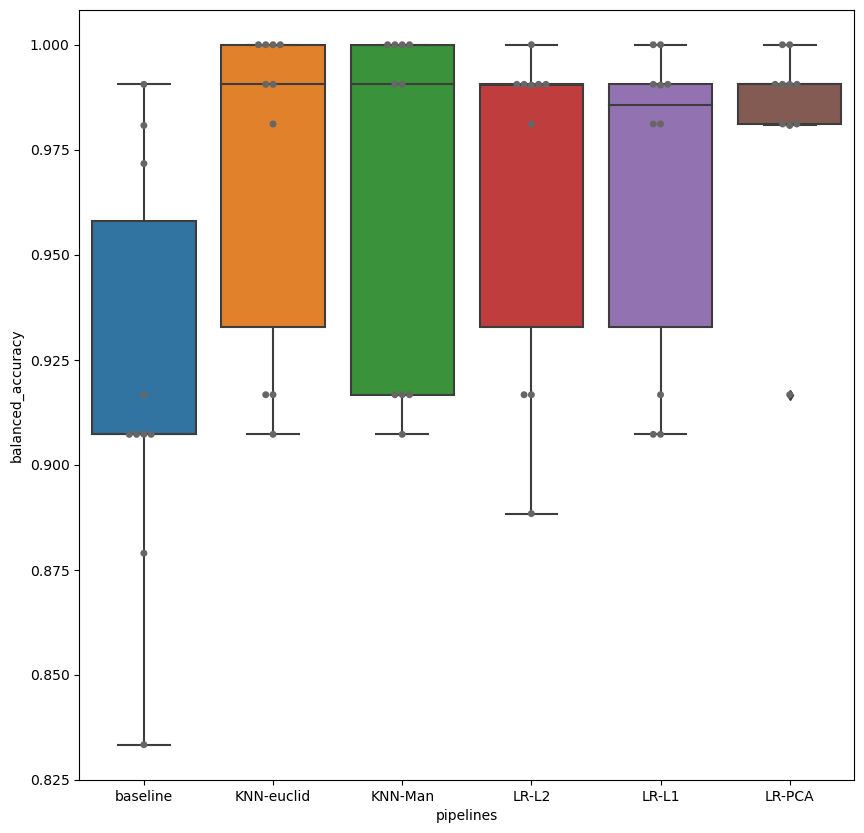

In [57]:
# Nota-se que o variância do dados no PCA é menor.
plt.figure(figsize=(10,10))

ax = sns.boxplot(x="pipelines", y="balanced_accuracy", data=df_res)
ax = sns.swarmplot(x="pipelines", y="balanced_accuracy", data=df_res, color=".40")


<Figure size 1000x1000 with 0 Axes>

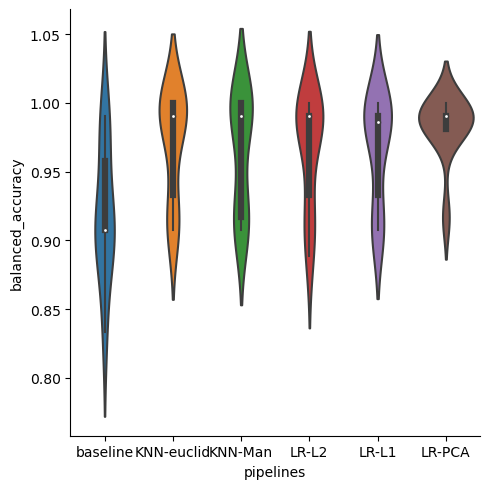

In [58]:
# Violin plot
plt.figure(figsize=(10,10))

sns.catplot(x="pipelines", y="balanced_accuracy", kind="violin", data=df_res)

In [61]:
# Retreino do pipeline selecionado com os dados do treinamento

lr = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('lr', LogisticRegression(
            penalty="l2",
            C=1,
            fit_intercept=True,
            class_weight="balanced",
            random_state=42)
        )
    ]
)

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
lr_pca_test = balanced_accuracy_score(y_test, y_pred)

print("Performance: ", round(lr_pca_test, 4))

Performance:  0.972


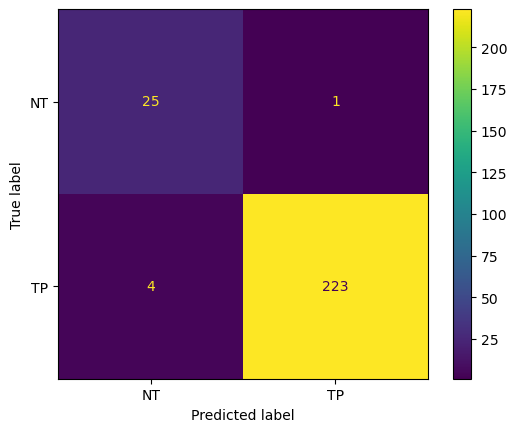

In [64]:
# Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test)
plt.show()

In [ ]:
# Interpretação do Confusion Matrix:
# Indica que o modelo identificou corretamente 25 pessoas sem o câncer (NT) e 223 pessoas com o câncer (TP).
# Em contra-partida, foram identicados incorretamente, 1 pessoa sem o câncer e 4 pessoac com câncer.

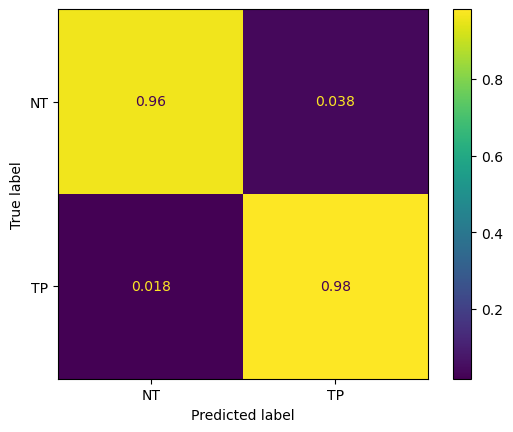

In [66]:
# Confusion Matrix em porcentagem
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test, normalize='true')
plt.show()